In [ ]:
import sklearn
import numpy as np
import torch
from torch import nn


In [ ]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

In [ ]:
from sklearn.datasets import make_circles

n_samples = 3000

X, y = make_circles(n_samples=n_samples, noise=0.03, random_state=42)

In [ ]:
X.shape, y.shape

((3000, 2), (3000,))

In [ ]:
len(X),len(y)

(3000, 3000)

In [ ]:
print(f'First 5 samples of X: {X[:5]}')
print(f'First 5 samples of y: {y[:5]}')

First 5 samples of X: [[ 0.20461446  0.7444964 ]
 [ 0.24036431 -0.97227107]
 [ 0.23168086  0.76518771]
 [ 0.4850385   0.86762023]
 [-0.39757169 -0.70306708]]
First 5 samples of y: [1 0 1 0 1]


In [ ]:
X.dtype, y.dtype

(dtype('float64'), dtype('int64'))

In [ ]:
import pandas as pd
circles = pd.DataFrame({'X1':X[:,0], 'X2':X[:,1], 'label':y})

In [ ]:
circles

,X1,X2,label
0,0.204614,0.744496,1
1,0.240364,-0.972271,0
2,0.231681,0.765188,1
3,0.485038,0.867620,0
4,-0.397572,-0.703067,1
...,...,...,...
2995,0.691894,0.483294,1
2996,-0.112814,-1.007035,0
2997,-0.004573,-1.009240,0
2998,0.686653,-0.770001,0


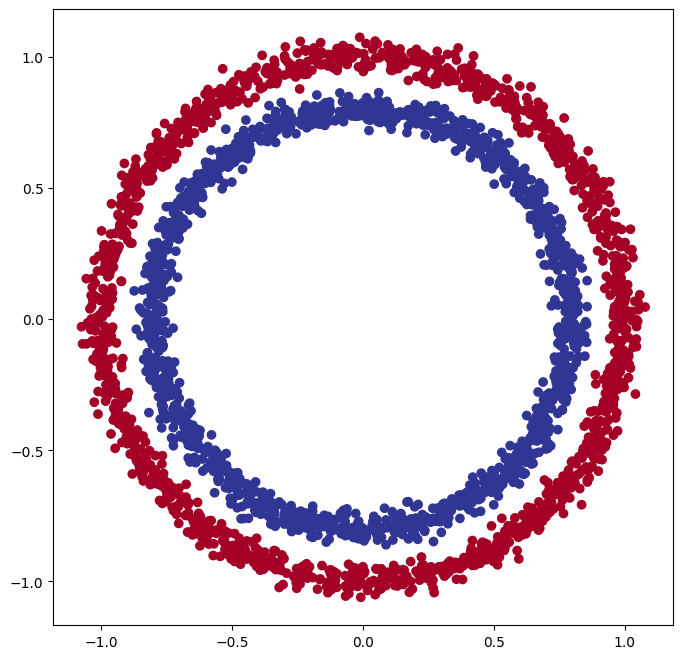

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,8))
plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.RdYlBu)

In [ ]:
X.shape, y.shape

((3000, 2), (3000,))

In [ ]:
torch.tensor(X).shape, torch.tensor(y).shape

(torch.Size([3000, 2]), torch.Size([3000]))

In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cpu'

In [ ]:
X = torch.from_numpy(X).type(torch.float).to(device)
y = torch.from_numpy(y).type(torch.float).to(device)

In [ ]:
X,y

(tensor([[ 0.2046,  0.7445],
         [ 0.2404, -0.9723],
         [ 0.2317,  0.7652],
         ...,
         [-0.0046, -1.0092],
         [ 0.6867, -0.7700],
         [-0.8643, -0.4251]]),
 tensor([1., 0., 1.,  ..., 0., 0., 0.]))

In [ ]:
X.dtype, y.dtype

(torch.float32, torch.float32)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

(torch.Size([2400, 2]),
 torch.Size([2400]),
 torch.Size([600, 2]),
 torch.Size([600]))

In [ ]:
len(X_train), len(y_train), len(X_test), len(y_test)

(2400, 2400, 600, 600)

In [ ]:
class BinaryClassifier(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1 = nn.Linear(in_features = 2, out_features=10)
    self.layer_2 = nn.Linear(in_features = 10, out_features=10)
    self.layer_3 = nn.ReLU()
    self.layer_4 = nn.Linear(in_features=10, out_features=1)

  def forward(self, x):
    return self.layer_4(self.layer_3(self.layer_2(self.layer_1(x))))

model = BinaryClassifier().to(device)
model.state_dict()

OrderedDict([('layer_1.weight',
              tensor([[ 0.5406,  0.5869],
                      [-0.1657,  0.6496],
                      [-0.1549,  0.1427],
                      [-0.3443,  0.4153],
                      [ 0.6233, -0.5188],
                      [ 0.6146,  0.1323],
                      [ 0.5224,  0.0958],
                      [ 0.3410, -0.0998],
                      [ 0.5451,  0.1045],
                      [-0.3301,  0.1802]])),
             ('layer_1.bias',
              tensor([-0.3258, -0.0829, -0.2872,  0.4691, -0.5582, -0.3260, -0.1997, -0.4252,
                       0.0667, -0.6984])),
             ('layer_2.weight',
              tensor([[ 0.2856, -0.2686,  0.2441,  0.0526, -0.1027,  0.1954,  0.0493,  0.2555,
                        0.0346, -0.0997],
                      [ 0.0850, -0.0858,  0.1331,  0.2823,  0.1828, -0.1382,  0.1825,  0.0566,
                        0.1606, -0.1927],
                      [-0.3130, -0.1222, -0.2426,  0.2595,  0.0911,  0.1

In [ ]:
loss_fn = nn.BCEWithLogitsLoss()
optimiser = torch.optim.Adam(params=model.parameters(), lr=0.05)

In [ ]:
def accuracy_fn(y_true, y_pred):
  correct = torch.eq(y_true, y_pred).sum().item()
  acc = (correct/len(y_pred))*100
  return acc

In [ ]:
model

BinaryClassifier(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): ReLU()
  (layer_4): Linear(in_features=10, out_features=1, bias=True)
)

In [ ]:
epochs = 200
epoch_count=[]
train_acc_values=[]
test_acc_values=[]

for epoch in range(epochs):
  model.train()

  y_logits = model.forward(X_train).squeeze()

  y_pred = torch.round(torch.sigmoid(y_logits))

  loss = loss_fn(y_logits, y_train)

  train_acc = accuracy_fn(y_true=y_train, y_pred=y_pred)

  optimiser.zero_grad()

  loss.backward()

  optimiser.step()


  if epoch % 10==0:
    epoch_count.append(epoch)
    train_acc_values.append(train_acc)

    model.eval()
    with torch.inference_mode():
      test_logits = model(X_test).squeeze()
      test_probabilities = torch.round(torch.sigmoid(test_logits))
      test_loss=loss_fn(test_logits, y_test)
      test_acc = accuracy_fn(y_test, test_probabilities)
      test_acc_values.append(test_acc)
      print(f'Epoch: {epoch} | Train Loss: {loss:.5f} | Test Loss: {test_loss:.5f} | Train Acc: {train_acc:.2f}% | Test Acc: {test_acc:.2f}%')


Epoch: 0 | Train Loss: 0.69677 | Test Loss: 0.68873 | Train Acc: 51.38% | Test Acc: 54.67%
Epoch: 10 | Train Loss: 0.65801 | Test Loss: 0.68044 | Train Acc: 63.58% | Test Acc: 55.50%
Epoch: 20 | Train Loss: 0.56922 | Test Loss: 0.57689 | Train Acc: 78.00% | Test Acc: 73.33%
Epoch: 30 | Train Loss: 0.36714 | Test Loss: 0.36369 | Train Acc: 89.21% | Test Acc: 88.17%
Epoch: 40 | Train Loss: 0.21908 | Test Loss: 0.22449 | Train Acc: 97.00% | Test Acc: 95.50%
Epoch: 50 | Train Loss: 0.13318 | Test Loss: 0.13168 | Train Acc: 99.25% | Test Acc: 98.83%
Epoch: 60 | Train Loss: 0.08714 | Test Loss: 0.09456 | Train Acc: 99.62% | Test Acc: 98.83%
Epoch: 70 | Train Loss: 0.06155 | Test Loss: 0.06687 | Train Acc: 99.50% | Test Acc: 99.00%
Epoch: 80 | Train Loss: 0.04549 | Test Loss: 0.05173 | Train Acc: 99.71% | Test Acc: 99.17%
Epoch: 90 | Train Loss: 0.03596 | Test Loss: 0.04274 | Train Acc: 99.79% | Test Acc: 99.33%
Epoch: 100 | Train Loss: 0.02992 | Test Loss: 0.03734 | Train Acc: 99.79% | Test 

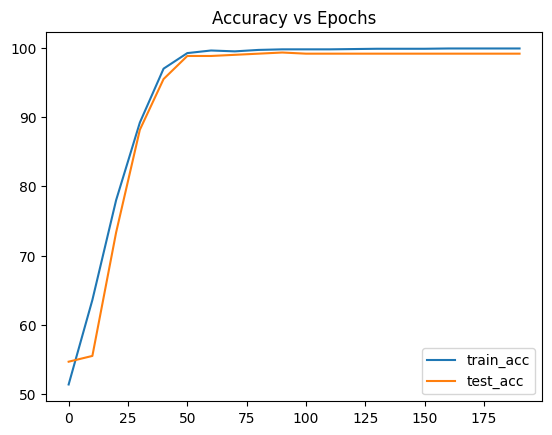

In [ ]:
plt.plot(epoch_count, train_acc_values, label='train_acc')
plt.plot(epoch_count, test_acc_values, label='test_acc')
plt.title('Accuracy vs Epochs')
plt.legend()

In [ ]:
model.eval()
with torch.inference_mode():
  logits=model(X_test.to(device)).squeeze()
  probs = torch.round(torch.sigmoid(logits))

probs[:10]==y_test[:10]

tensor([True, True, True, True, True, True, True, True, True, True])

In [ ]:
NUM_CLASSES = 5
NUM_FEATURES = 10
RANDOM_SEED=42
new_data = sklearn.datasets.make_blobs(n_samples=1000,
                                       n_features=NUM_FEATURES,
                                       centers=NUM_CLASSES,
                                       cluster_std=2.5,
                                       random_state=RANDOM_SEED)

In [ ]:
new_data

(array([[  3.77148503,  -6.27148314,  -3.73818176, ...,  -1.97768081,
          -2.66931211,  -9.758105  ],
        [ -1.68199704,  11.09810853,  -0.34446027, ...,   8.37107044,
           0.2597706 ,   4.02202886],
        [ -0.50817381,  10.90001445,   7.61216226, ...,   5.11883629,
           1.61463283,   2.29919494],
        ...,
        [ -2.6328569 ,  10.70133486,   1.83307378, ...,  13.46177327,
           0.42795027,   2.83395917],
        [  2.73953653, -15.81043075, -10.71809453, ...,  -4.30898195,
           0.40223921,  -0.21201206],
        [ -8.568178  ,  10.77519097,   7.76078734, ...,  -4.72106551,
          -0.95987557,   1.3559104 ]]),
 array([2, 0, 0, 3, 0, 4, 1, 3, 0, 4, 1, 0, 3, 0, 0, 1, 4, 3, 3, 1, 1, 2,
        2, 3, 4, 2, 4, 2, 1, 2, 0, 1, 0, 1, 3, 1, 2, 0, 2, 2, 3, 0, 0, 2,
        2, 2, 4, 1, 1, 4, 2, 3, 0, 4, 4, 0, 0, 2, 4, 1, 0, 1, 0, 4, 3, 3,
        3, 2, 1, 0, 1, 1, 1, 3, 1, 4, 3, 2, 4, 3, 3, 2, 1, 0, 2, 1, 2, 3,
        2, 0, 4, 0, 1, 3, 0, 0, 0, 0, 1, 

In [ ]:
new_data[0]

array([[  3.77148503,  -6.27148314,  -3.73818176, ...,  -1.97768081,
         -2.66931211,  -9.758105  ],
       [ -1.68199704,  11.09810853,  -0.34446027, ...,   8.37107044,
          0.2597706 ,   4.02202886],
       [ -0.50817381,  10.90001445,   7.61216226, ...,   5.11883629,
          1.61463283,   2.29919494],
       ...,
       [ -2.6328569 ,  10.70133486,   1.83307378, ...,  13.46177327,
          0.42795027,   2.83395917],
       [  2.73953653, -15.81043075, -10.71809453, ...,  -4.30898195,
          0.40223921,  -0.21201206],
       [ -8.568178  ,  10.77519097,   7.76078734, ...,  -4.72106551,
         -0.95987557,   1.3559104 ]])

In [ ]:
new_data[1]

array([2, 0, 0, 3, 0, 4, 1, 3, 0, 4, 1, 0, 3, 0, 0, 1, 4, 3, 3, 1, 1, 2,
       2, 3, 4, 2, 4, 2, 1, 2, 0, 1, 0, 1, 3, 1, 2, 0, 2, 2, 3, 0, 0, 2,
       2, 2, 4, 1, 1, 4, 2, 3, 0, 4, 4, 0, 0, 2, 4, 1, 0, 1, 0, 4, 3, 3,
       3, 2, 1, 0, 1, 1, 1, 3, 1, 4, 3, 2, 4, 3, 3, 2, 1, 0, 2, 1, 2, 3,
       2, 0, 4, 0, 1, 3, 0, 0, 0, 0, 1, 2, 1, 3, 1, 4, 1, 4, 3, 3, 3, 4,
       4, 2, 2, 0, 4, 4, 4, 0, 0, 2, 1, 1, 0, 0, 4, 4, 1, 2, 4, 0, 3, 4,
       4, 3, 3, 0, 2, 2, 0, 1, 3, 2, 2, 3, 0, 1, 1, 0, 0, 4, 4, 0, 3, 3,
       1, 4, 1, 3, 3, 4, 1, 4, 4, 1, 2, 2, 1, 2, 1, 1, 4, 0, 2, 1, 3, 4,
       2, 1, 3, 4, 0, 3, 2, 3, 1, 3, 4, 3, 2, 0, 0, 4, 4, 4, 3, 4, 3, 1,
       2, 0, 2, 2, 0, 1, 1, 0, 1, 0, 2, 4, 1, 3, 2, 2, 3, 1, 2, 3, 2, 1,
       0, 3, 2, 3, 3, 3, 1, 3, 2, 4, 3, 0, 1, 4, 1, 1, 2, 4, 2, 1, 2, 4,
       0, 4, 4, 3, 0, 4, 3, 4, 1, 1, 2, 3, 2, 4, 1, 4, 1, 0, 4, 3, 3, 4,
       0, 0, 2, 2, 2, 2, 4, 4, 2, 1, 2, 1, 1, 1, 3, 1, 2, 2, 2, 2, 4, 1,
       3, 2, 3, 3, 2, 3, 0, 1, 0, 2, 3, 4, 0, 3, 4,

In [ ]:
X = torch.from_numpy(new_data[0]).to(device).type(torch.float)
y = torch.from_numpy(new_data[1]).to(device).type(torch.float)
X, y

(tensor([[  3.7715,  -6.2715,  -3.7382,  ...,  -1.9777,  -2.6693,  -9.7581],
         [ -1.6820,  11.0981,  -0.3445,  ...,   8.3711,   0.2598,   4.0220],
         [ -0.5082,  10.9000,   7.6122,  ...,   5.1188,   1.6146,   2.2992],
         ...,
         [ -2.6329,  10.7013,   1.8331,  ...,  13.4618,   0.4280,   2.8340],
         [  2.7395, -15.8104, -10.7181,  ...,  -4.3090,   0.4022,  -0.2120],
         [ -8.5682,  10.7752,   7.7608,  ...,  -4.7211,  -0.9599,   1.3559]]),
 tensor([2., 0., 0., 3., 0., 4., 1., 3., 0., 4., 1., 0., 3., 0., 0., 1., 4., 3.,
         3., 1., 1., 2., 2., 3., 4., 2., 4., 2., 1., 2., 0., 1., 0., 1., 3., 1.,
         2., 0., 2., 2., 3., 0., 0., 2., 2., 2., 4., 1., 1., 4., 2., 3., 0., 4.,
         4., 0., 0., 2., 4., 1., 0., 1., 0., 4., 3., 3., 3., 2., 1., 0., 1., 1.,
         1., 3., 1., 4., 3., 2., 4., 3., 3., 2., 1., 0., 2., 1., 2., 3., 2., 0.,
         4., 0., 1., 3., 0., 0., 0., 0., 1., 2., 1., 3., 1., 4., 1., 4., 3., 3.,
         3., 4., 4., 2., 2., 0., 4.,

In [ ]:
X.shape, y.shape

(torch.Size([1000, 10]), torch.Size([1000]))

In [ ]:
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

(torch.Size([800, 10]),
 torch.Size([200, 10]),
 torch.Size([800]),
 torch.Size([200]))

In [ ]:
class MultiClassifier(nn.Module):
  def __init__(self, input_features=10, output_features=5, hidden_units=20):
    super().__init__()
    self.sequential = nn.Sequential(
        nn.Linear(in_features=input_features, out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units, out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units, out_features=output_features)
    )

  def forward(self, x):
    return self.sequential(x)

multi_class_model = MultiClassifier().to(device)
multi_class_model

MultiClassifier(
  (sequential): Sequential(
    (0): Linear(in_features=10, out_features=20, bias=True)
    (1): ReLU()
    (2): Linear(in_features=20, out_features=20, bias=True)
    (3): ReLU()
    (4): Linear(in_features=20, out_features=5, bias=True)
  )
)

In [ ]:
loss_fn = nn.CrossEntropyLoss()
optimiser = torch.optim.Adam(params=multi_class_model.parameters(), lr=0.02)

In [ ]:
epochs = 100
accuracy_values=[]
train_loss_values=[]
test_loss_values=[]
epoch_count=[]

for epoch in range(epochs):
  multi_class_model.train()

  y_logits = multi_class_model(X_train)
  y_preds = torch.softmax(y_logits, dim=1).argmax(dim=1)

  loss = loss_fn(y_logits, y_train.type(torch.long))
  train_acc = accuracy_fn(y_true=y_train, y_pred=y_preds)

  optimiser.zero_grad()
  loss.backward()
  optimiser.step()

  if epoch%10 == 0:
    model.eval()
    accuracy_values.append(train_acc)
    epoch_count.append(epoch)
    with torch.inference_mode():
      test_logits = multi_class_model(X_test)
      test_preds = torch.softmax(test_logits, dim=1).argmax(dim=1)

      test_loss = loss_fn(test_logits, y_test.type(torch.long))
      test_acc = accuracy_fn(y_test, test_preds)

      train_loss_values.append(loss.item())
      test_loss_values.append(test_loss.item())

      print(f'Epoch: {epoch} | Train Loss: {loss:.5f} | Test Loss: {test_loss:.5f}| Train Acc: {train_acc:.2f}% | Test Acc: {test_acc:.2f}%')

Epoch: 0 | Train Loss: 1.60830 | Test Loss: 1.16133| Train Acc: 40.88% | Test Acc: 58.50%
Epoch: 10 | Train Loss: 0.00471 | Test Loss: 0.00436| Train Acc: 99.88% | Test Acc: 100.00%
Epoch: 20 | Train Loss: 0.00006 | Test Loss: 0.01154| Train Acc: 100.00% | Test Acc: 99.50%
Epoch: 30 | Train Loss: 0.00001 | Test Loss: 0.00882| Train Acc: 100.00% | Test Acc: 99.50%
Epoch: 40 | Train Loss: 0.00001 | Test Loss: 0.00687| Train Acc: 100.00% | Test Acc: 99.50%
Epoch: 50 | Train Loss: 0.00001 | Test Loss: 0.00578| Train Acc: 100.00% | Test Acc: 99.50%
Epoch: 60 | Train Loss: 0.00001 | Test Loss: 0.00509| Train Acc: 100.00% | Test Acc: 99.50%
Epoch: 70 | Train Loss: 0.00000 | Test Loss: 0.00459| Train Acc: 100.00% | Test Acc: 99.50%
Epoch: 80 | Train Loss: 0.00000 | Test Loss: 0.00420| Train Acc: 100.00% | Test Acc: 99.50%
Epoch: 90 | Train Loss: 0.00000 | Test Loss: 0.00388| Train Acc: 100.00% | Test Acc: 99.50%


In [ ]:
    model.eval()
    with torch.inference_mode():
      test_logits = multi_class_model(X_test)
      test_probs = torch.softmax(test_logits, dim=1)
      print(f'Test Logits: {test_logits[:5]}')
      print(f'Test Probs: {test_probs[:5]}')


      y_preds = torch.argmax(test_probs, dim=1)
      print(f'Test Preds: {y_preds[:5]}')
      print(f'Test Labels: {y_test[:5]}')
      print(f'Test Classification Report\n {sklearn.metrics.classification_report(y_test.cpu(), y_preds.cpu())}')


Test Logits: tensor([[ 22.1277, -17.2828, -22.9705, -18.3301,  -9.4949],
        [-24.1815, -31.5277, -13.3829,  23.8838,  -8.2617],
        [ -7.7687, -18.6042, -16.6245, -11.0714,  20.1655],
        [-22.7473, -28.9293, -13.1352,  24.5130,  -9.1724],
        [ 16.9503, -12.6239, -18.1697, -15.3838,  -7.3107]])
Test Probs: tensor([[1.0000e+00, 7.6606e-18, 2.5949e-20, 2.6878e-18, 1.8471e-14],
        [1.3351e-21, 8.6112e-25, 6.5355e-17, 1.0000e+00, 1.0949e-14],
        [7.3846e-13, 1.4539e-17, 1.0528e-16, 2.7163e-14, 1.0000e+00],
        [2.9859e-21, 6.1699e-24, 4.4623e-17, 1.0000e+00, 2.3475e-15],
        [1.0000e+00, 1.4325e-13, 5.5920e-16, 9.0667e-15, 2.9079e-11]])
Test Preds: tensor([0, 3, 4, 3, 0])
Test Labels: tensor([0., 3., 4., 3., 0.])
Test Classification Report
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        45
         1.0       1.00      1.00      1.00        32
         2.0       1.00      1.00      1.00        43


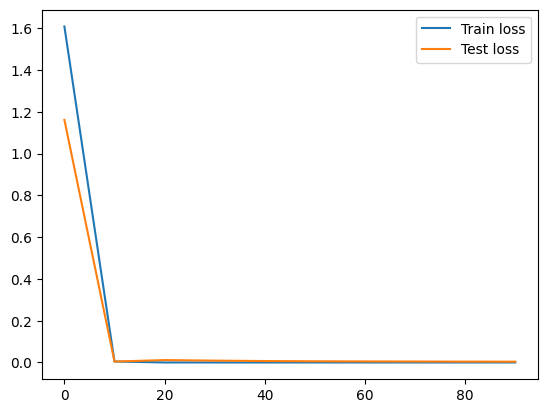

In [ ]:
plt.plot(epoch_count, train_loss_values, label='Train loss')
plt.plot(epoch_count, test_loss_values, label='Test loss')
plt.legend()
plt.show()

In [ ]:
# !pip install torchmetrics
import torchmetrics

In [ ]:
accuracy = torchmetrics.Accuracy(task="multiclass", num_classes=5)
accuracy(y_preds, y_test)

tensor(0.9950)

In [ ]:
y_preds.shape, y_test.shape

(torch.Size([200]), torch.Size([200]))

In [ ]:
loss

tensor(2.6962e-06, grad_fn=<NllLossBackward0>)